## Ejercicio 4
### Regresión Logistica

### Churn: 
Pérdida/deserción de clientes de la compañía. Especialmente, las industrias en las que la adquisición de usuarios es costosa, es de vital importancia para una empresa reducir e idealmente hacer que la deserción se reduzca a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes nuevos, se plantea un problema emocionante/difícil para ML.

### Data
El dataset proviene de un proveedor de servicios de telecomunicaciones donde tienen el uso del servicio (plan internacional, plan de correo de voz, uso durante el día, uso en tardes y noches, etc.) e información demográfica básica (estado y código de área) del usuario. Y es que el cliente esté retirado o no.

In [1]:
import pandas as pd
data = pd.read_csv('https://github.com/vanejaime/Curso_Python_CD/raw/master/datasets/churn.csv')

In [2]:
data.head()

,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
data.columns

Index(['Account Length', 'Area Code', 'Phone', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'],
      dtype='object')

# Ejercicio 4.1

Cree Y y X

Cual es la distribución de los churners?

Divida el dataset en train (70%) and test (30%)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np

In [5]:
train =data
train.columns = train.columns.str.replace(' ','_')
train.columns = train.columns.str.replace('?','')

In [6]:
train.columns

Index(['Account_Length', 'Area_Code', 'Phone', 'Int'l_Plan', 'VMail_Plan',
       'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins',
       'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [7]:
feature_cols=['VMail_Plan','VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins','Eve_Calls', 'Eve_Charge', 
              'Night_Mins', 'Night_Calls', 'Night_Charge','Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn']

In [8]:
train['VMail_Plan'] = train.VMail_Plan.map({'yes':1, 'no':0})

In [9]:
train['Churn'] = train.Churn.map({'True.':1, 'False.':0})

In [10]:
X = train[feature_cols]
y = train['Churn']

In [11]:
X.head()

,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


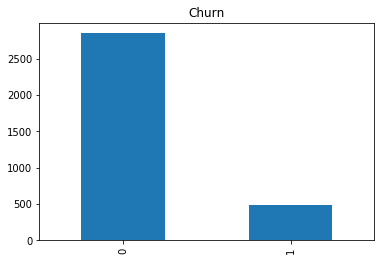

In [36]:
plot = train["Churn"].value_counts().plot(kind='bar',
                                            title='Churn',)

In [13]:
pd.pivot_table(train, index='Churn',aggfunc="count")["Account_Length"]

Churn
0    2850
1     483
Name: Account_Length, dtype: int64

In [14]:
Churn_=pd.pivot_table(train, index='Churn',aggfunc="count")[1:2]["Account_Length"]
Churn_/(len(train))

Churn
1    0.144914
Name: Account_Length, dtype: float64

In [15]:
validation_size = 0.30

In [25]:
X_train, X_test= train_test_split(X,test_size=validation_size)
y_train, y_test = train_test_split(y,test_size=validation_size)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2333, 16)
(1000, 16)
(2333,)
(1000,)


# Ejercicio 4.2

Entrene una regresion logistica usando el set de train y aplique el algoritmo en el set de test

In [31]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred_class = logreg.predict(X_test)

# Ejercicio 4.3

a) Cree la matriz de confusion 

b) Estime el accuracy y otras medidas desempeño

In [33]:
print(confusion_matrix(y_test, y_pred_class))

[[869   0]
 [131   0]]


In [34]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.869


In [35]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       869
           1       0.00      0.00      0.00       131

    accuracy                           0.87      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.76      0.87      0.81      1000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
